In [1]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))   
%load_ext autoreload
%autoreload 1

Author: Andrew Tarzia

Date Created: 12 Jul 2018

License:

# Notebook for getting molecule parameters using RDKIT


In [2]:
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Descriptors3D import NPR1, NPR2, PMI1, PMI2, PMI3
from rdkit.Chem.Draw.MolDrawing import MolDrawing
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Geometry import rdGeometry
from rdkit.Chem import PyMol
from rdkit import Geometry
import tempfile
import matplotlib.pyplot as plt
%aimport rdkit_functions
%aimport ellipsoid

# Notes:
# Todo:
- timing
 - speed up reading: https://rdkit.blogspot.com/2016/09/avoiding-unnecessary-work-and.html

In [3]:
# molecule file dir
molecule_file = '/home/atarzia/psp/biomin_assays/molecules/molecules.txt'
# output dir
output_dir = '/home/atarzia/psp/biomin_assays/molecules/'

In [4]:
def define_plot_variables(ax, title, ytitle, xtitle, xlim, ylim):
    """
    Series of matplotlib pyplot settings to make all plots unitform.
    """
    # Set number of ticks for x-axis
    ax.tick_params(axis='both', which='major', labelsize=16)

    ax.set_ylabel(ytitle, fontsize=16)
    # ax.legend([y, n], ['aligned', 'not aligned'], loc=4, fancybox=True)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticklabels(['diffuses', 'does not diffuse'])
    ax.set_xticks([0.25, 0.75])


def define_parity_plot_variables(ax, title, ytitle, xtitle, xlim, ylim):
    """
    Series of matplotlib pyplot settings to make all plots unitform.
    """
    # Set number of ticks for x-axis
    ax.tick_params(axis='both', which='major', labelsize=16)

    ax.set_xlabel(xtitle, fontsize=16)
    ax.set_ylabel(ytitle, fontsize=16)
    # ax.legend([y, n], ['aligned', 'not aligned'], loc=4, fancybox=True)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [5]:
df, molecules, diameters = rdkit_functions.read_mol_txt_file(molecule_file)
rdkit_functions.produce_quick_fig_mol(molecules, output_dir+'molecules.pdf')

## Calculate size and shape

In [9]:
try:
    v = PyMol.MolViewer()
except ConnectionRefusedError:
    pass

In [10]:
molecules

{'2,6-dichloroindophenol': 'C1=CC(=O)C=CC1=NC2=CC(=C(C(=C2)Cl)O)Cl',
 '2-octanol': 'CCCCCCC(C)O',
 '3-amino-1,2,4-triazole': 'C1=NNC(=N1)N',
 '5-Methylphenazin-5-ium': 'C[N+]1=C2C=CC=CC2=NC3=CC=CC=C31',
 'ABTS': 'CCN1C2=C(C=C(C=C2)S(=O)(=O)[O-])SC1=NN=C3N(C4=C(S3)C=C(C=C4)S(=O)(=O)[O-])CC',
 'Amplex Red': 'CC(=O)N1C2=C(C=C(C=C2)O)OC3=C1C=CC(=C3)O',
 'D-fructose': 'C1C(C(C(C(O1)(CO)O)O)O)O',
 'D-glucose (chain)': 'C(C(C(C(C(C=O)O)O)O)O)O',
 'D-glucose (ring)': 'C(C1C(C(C(C(O1)O)O)O)O)O',
 'Gluconolactone': 'C(C1C(C(C(C(=O)O1)O)O)O)O',
 'L-fructose': 'C(C(C(C(C(=O)CO)O)O)O)O',
 'L-lactate': 'CC(C(=O)[O-])[O-]',
 'Urea': 'C(=O)(N)N',
 'acetic acid': 'CC(=O)O',
 'ammonia': 'N',
 'butyric acid': 'CCCC(=O)O',
 'carbon dioxide': 'C(=O)=O',
 'decanoic acid': 'CCCCCCCCCC(=O)O',
 'dodecanoic acid': 'CCCCCCCCCCCC(=O)O',
 'gluconic acid': 'C(C(C(C(C(C(=O)O)O)O)O)O)O',
 'hexanoic acid': 'CCCCCC(=O)O',
 'hydrogen peroxide': 'OO',
 'methosulfate': 'COS(=O)(=O)[O-]',
 'methyl ethyl ketone peroxide': '

molecule: p-nitrophenyl dodecanoate : SMILES: CCCCCCCCCCCC(=O)OC1=CC=C(C=C1)[N+](=O)[O-]
No. of conformers: 50
0
2067 3653
2734 3265
2520 3048
1
2129 3851
2635 3077
2701 3016
2
1975 3613
2501 2921
2591 3023
3
2047 3908
2583 3078
2602 3301
4
2089 3951
2689 3168
2780 3180
5
2020 3560
2291 2873
2647 3021
6
2028 3792
2661 3167
2673 3148
7
2069 3991
2649 3252
2838 3279
8
2177 4040
2998 3359
2788 3241
9
1990 3570
2653 3228
2578 3064
10
2148 4272
2897 3297
2851 3350
11
2088 4272
2985 3406
2887 3389
12
1908 3831
2693 3180
2670 3178
13
2026 3774
2652 3177
2695 3198
14
1780 3587
2661 3195
2664 3187
15
1963 3496
2637 3095
2667 3069
16
1869 4031
2951 3359
2775 3183
17
2149 4291
2946 3461
2921 3314
18
2189 4272
2840 3261
2903 3386
19
1830 3890
2633 3295
2783 3186
20
1970 4030
2734 3248
2807 3196
21
1928 4107
2968 3379
2992 3453
22
2050 4051
2684 3310
2602 3227
23
2055 3495
2567 2889
2573 3063
24
2023 3799
2745 3164
2792 3302
25
2070 4010
2849 3294
2841 3265
26
1975 3467
2589 2859
2635 3095
27
1987 

SystemExit: 

/home/atarzia/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


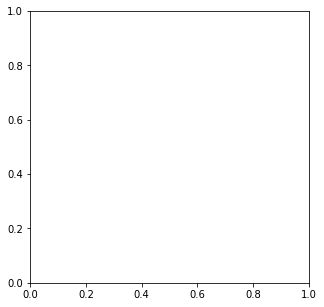

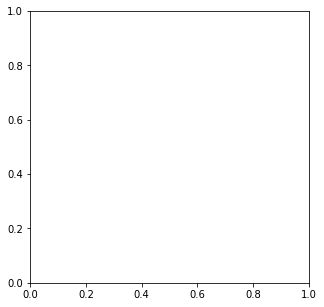

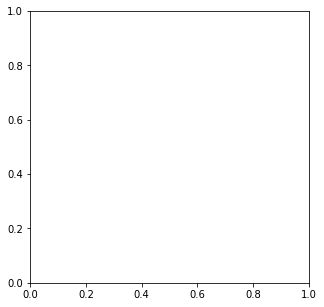

In [11]:
fig1, ax1 = plt.subplots(figsize=(5,5))
fig2, ax2 = plt.subplots(figsize=(5,5))
fig3, ax3 = plt.subplots(figsize=(5,5))
# spacing in X direction
dx = 0.15
# threshold for diffusion through ZIF-8
# from Exploring the Framework Hydrophobicity and Flexibility 
# of ZIF-8: From Biofuel Recovery to Hydrocarbon Separations
threshold = 4.2

min_diam_sums = []
mid_diam_sums = []
avg_diam_sums = []
for T in np.arange(1):
    for name, smile in molecules.items():
        if name != 'p-nitrophenyl dodecanoate':
            continue
        print('molecule:', name,':', 'SMILES:', smile)
        try:
            kin_diam = float(diameters[name])
        except ValueError:
            print('no radius given for this molecule - skipped')
            continue

        # Read SMILES and add Hs
        mol = Chem.AddHs(Chem.MolFromSmiles(smile))
        # 2D to 3D
        # with multiple conformers
        cids = Chem.EmbedMultipleConfs(mol, 50) #, Chem.ETKDG())
        print('No. of conformers:', len(cids))
        # quick UFF optimize
        for cid in cids: Chem.UFFOptimizeMolecule(mol, confId=cid)
        # align all conformers
        # Chem.AlignMolConformers(mol, [0])
        rdkit_functions.show_all_conformers(v, mol, cids)
        mol_coms = rdkit_functions.get_COMs(mol, cids)
        # get principal moments of intertia
        _, _, _, ratio_1_, ratio_2_ = rdkit_functions.get_inertial_prop(mol, cids)
        # print(np.average(ratio_1_), np.average(ratio_2_))
        conf_diameters, conf_axes, conf_moments = rdkit_functions.get_vdw_diameters(mol, cids, 
                                                                    mol_coms, 
                                                                    vdwScale=1.0, 
                                                                    boxMargin=4.0, 
                                                                    spacing=0.2,
                                                                    vec_spacing=0.01,
                                                                    show=False, 
                                                                    plot=False)
        
        # show one conformers axes of inertia in pymol
        # rdkit_functions.show_axes(mol, confId, mol_coms, conf_axes)
        diams = [sorted(i) for i in conf_diameters]
        min_diam = np.average([i[0] for i in diams])  # use the avg min diam
        mid_diam = np.average([i[1] for i in diams])  # use the avg intermediate diam
        print('minimum diameter =', round(min_diam, 3), 'angstrom')
        print('intermediate diameter =', round(mid_diam, 3), 'angstrom')
        min_diam_sums.append(min_diam)
        mid_diam_sums.append(mid_diam) 
        avg_diam_sums.append(np.average([min_diam, mid_diam]))
        # for categorical plot - use the experimental results
        # get the diffusion binary result
        diffuses = df[df['molecule'] == name]['diffuse'].iloc[0]
        if mid_diam <= threshold:
            C = 'b'
            M = 'o'
            E = 'k'
            D = 0.25
        else:
            C = 'r'
            M = 'X'
            E = 'k'
            D = 0.75
        ax1.scatter(D+(dx*(np.random.random() - 0.5) * 2),
                    mid_diam, c=C, 
                    edgecolors=E, marker=M, alpha=1.0,
                    s=80)
        ax2.scatter(kin_diam, mid_diam, c=C, 
                    edgecolors=E, marker=M, alpha=1.0,
                    s=80)
        ax3.scatter(np.average(ratio_1_), np.average(ratio_2_),
                    c=C, 
                    edgecolors=E, marker=M, alpha=1.0,
                    s=80)
    
ax1.axhline(y=threshold, c='k')
define_plot_variables(ax1,
                      title='',
                      xtitle='',
                      ytitle='intermediate diameter [$\mathrm{\AA}$]',
                      xlim=(0, 1),
                      ylim=(0, 10))
fig1.tight_layout()
fig1.savefig(output_dir+"categorical.pdf", dpi=720,
            bbox_inches='tight')


ax2.plot(np.linspace(-1, 12, 2), np.linspace(-1, 12, 2), c='k', alpha=0.4)
ax2.axvspan(4.0, 4.2, facecolor='r', alpha=0.5)  # plot the limit from the two Sholl papers on diffusion


define_parity_plot_variables(ax2,
                             title='',
                             xtitle='kinetic diameter [$\mathrm{\AA}$]',
                             ytitle='intermediate diameter [$\mathrm{\AA}$]',
                             xlim=(0, 10),
                             ylim=(0, 10))

fig2.tight_layout()
fig2.savefig(output_dir+"parity.pdf", dpi=720,
            bbox_inches='tight')


ax3.plot([0, 0.5, 1, 0], [1, 0.5, 1, 1], c='k', lw=2)
ax3.text(0.75, 1.01, 'sphere', fontsize=20)
ax3.text(0.4, 0.45, 'disk', fontsize=20)
ax3.text(-0.05, 1.01, 'rod', fontsize=20)
define_parity_plot_variables(ax3,
                             title='',
                             xtitle='$I_1$ / $I_3$',
                             ytitle='$I_2$ / $I_3$',
                             xlim=(-0.1, 1.1),
                             ylim=(0.4, 1.1))
fig3.tight_layout()
fig3.savefig(output_dir+"shape.pdf", dpi=720,
            bbox_inches='tight')

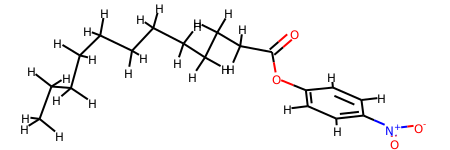

In [12]:
mol

In [13]:
vdwScale = 1.0
spacing = 0.5
boxMargin  = 4.0
vec_spacing = 1.0

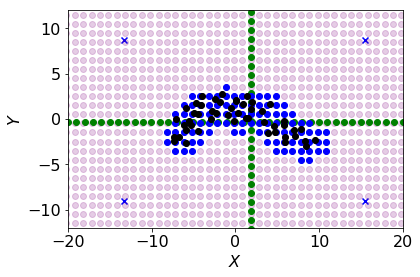

In [14]:
fig, ax = plt.subplots()
confId = 0
conf = mol.GetConformer(confId)
# Chem.CanonicalizeConformer(conf)  # align principal axes with X, Y, Z
atom_positions = conf.GetPositions()
ax.scatter(atom_positions[:, 0], atom_positions[:, 1], c='k', alpha=0.2)
box, sideLen, shape = rdkit_functions.get_molec_shape(mol, conf, confId, vdwScale=vdwScale, 
                                         boxMargin=boxMargin,
                                         spacing=spacing)
ax.scatter(box[1].x+boxMargin, box[1].y+boxMargin, c='b', marker='x')
ax.scatter(box[0].x-boxMargin, box[1].y+boxMargin, c='b', marker='x')
ax.scatter(box[0].x-boxMargin, box[0].y-boxMargin, c='b', marker='x')
ax.scatter(box[1].x+boxMargin, box[0].y-boxMargin, c='b', marker='x')
axes, moments = Chem.ComputePrincipalAxesAndMoments(conf, ignoreHs=False)
COM = mol_coms[confId]
ax.scatter(COM[0], COM[1], c='r')
max_side_len = max([i*2 for i in sideLen])

# define directions based on AX1, AX2, AX3
# use two AX to define plane, and 3rd AX to define direction of vectors
AX1 = np.array([1, 0, 0])
AX2 = np.array([0, 1, 0])
AX3 = np.array([0, 0, 1])
v1, v2 = rdkit_functions.define_plane(AX1, AX2, COM, max_side_len, vec_spacing=vec_spacing)
hit_points = []
for i in range(v1.shape[0]):
    for j in range(v2.shape[0]):
        # point in plane
        a = v1[i] + v2[j]
        ax.scatter(a[0], a[1], c='purple', alpha=0.2)
        # define a series of points that exist on a vector along 3rd AX
        # that goes through 'a'
        dist_a = np.arange(-max_side_len, max_side_len + 0.1, vec_spacing)
        vect_a = np.asarray([(i)*AX3 for i in dist_a]) + a
        
        # determine if the series of points hits VDW cloud
        for p in vect_a:
            pt = rdkit_functions.def_point(*p)
            if shape.GetValPoint(pt) > 2:
                hit_points.append(np.array([pt.x, pt.y, pt.z]))
                break
                
hit_points = np.asarray(hit_points)
ax.scatter(v1[:, 0], v1[:, 1], c='green')
ax.scatter(v2[:, 0], v2[:, 1], c='green')
ax.scatter(hit_points[:, 0], hit_points[:, 1], c='b')

ax.scatter(atom_positions[:, 0], atom_positions[:, 1], c='k', alpha=1)

define_parity_plot_variables(ax, title='',
                             xtitle='$X$',
                             ytitle='$Y$',
                             xlim=(-20, 20),
                             ylim=(-12, 12))

In [27]:
hit_points = []
for idx in range(shape.GetSize()):
    pt = shape.GetGridPointLoc(idx)
    value = shape.GetVal(idx)
    if value > 2:
        point = np.array([pt.x, pt.y, pt.z])
        hit_points.append(point)
hit_points = np.asarray(hit_points)

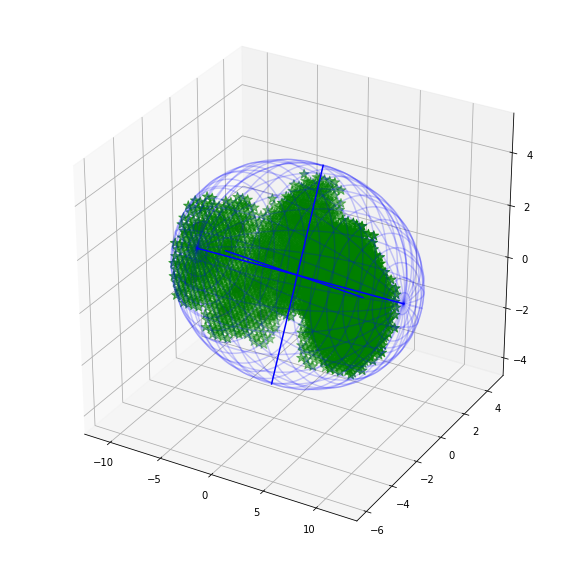

In [28]:
P = hit_points  # np.reshape([random()*100 for i in range(300)],(100,3))
# find the ellipsoid
ET = ellipsoid.EllipsoidTool()
(center, radii, rotation) = ET.getMinVolEllipse(P, .01)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# plot points
ax.scatter(atom_positions[:,0], atom_positions[:,1], atom_positions[:,2],
           color='k', marker='o', s=100)
ax.scatter(P[:,0], P[:,1], P[:,2], color='g', marker='*', s=100)

# plot ellipsoid
ET.plotEllipsoid(center, radii, rotation, ax=ax, plotAxes=True)

plt.show()

(0, 10)

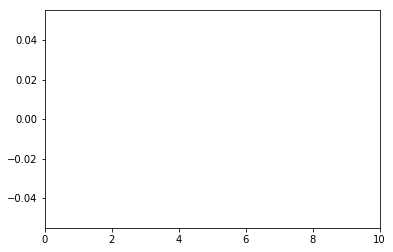

In [100]:
plt.hist(min_diam_sums, facecolor='k', alpha=0.4)
plt.hist(mid_diam_sums, facecolor='r', alpha=0.4)
plt.hist(avg_diam_sums, facecolor='b', alpha=0.4)
plt.xlim(0, 10)